In [1]:
from qiskit_aer import AerSimulator
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler, QiskitRuntimeService
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

In [2]:
from current_circuit import *

In [3]:
quantum_circuitc = current_circuit()
qc = quantum_circuitc.get_current_circuit()

#without noise

In [4]:
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
run_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = Sampler()
    result = sampler.run([run_qc]).result()

In [5]:
qc.cregs

[ClassicalRegister(10, 'c')]

In [6]:
result[0].data.c.get_counts()

{'1111111111': 1024}

In [7]:
results = list(result[0].data.c.get_counts().keys())[0]
carry_out = results[0]
sum = results[1]
print("Carry Out:",carry_out,", Sum:",sum)

Carry Out: 1 , Sum: 1


#simulation with noise

In [8]:
#connect to your ibm_quantum account
service = QiskitRuntimeService()

real_backend = service.backend("ibm_brisbane")
aer = AerSimulator.from_backend(real_backend)
 
# Run the sampler job locally using AerSimulator.
pass_manager = generate_preset_pass_manager(backend=aer, optimization_level=1)
qc_transpiled = pass_manager.run(qc)
sampler = Sampler(mode=aer)
noiseresult = sampler.run([qc_transpiled]).result()

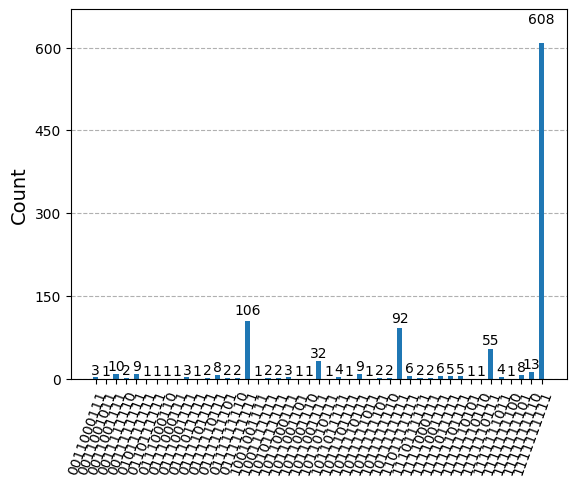

In [9]:
plot_histogram(noiseresult[0].data.c.get_counts())

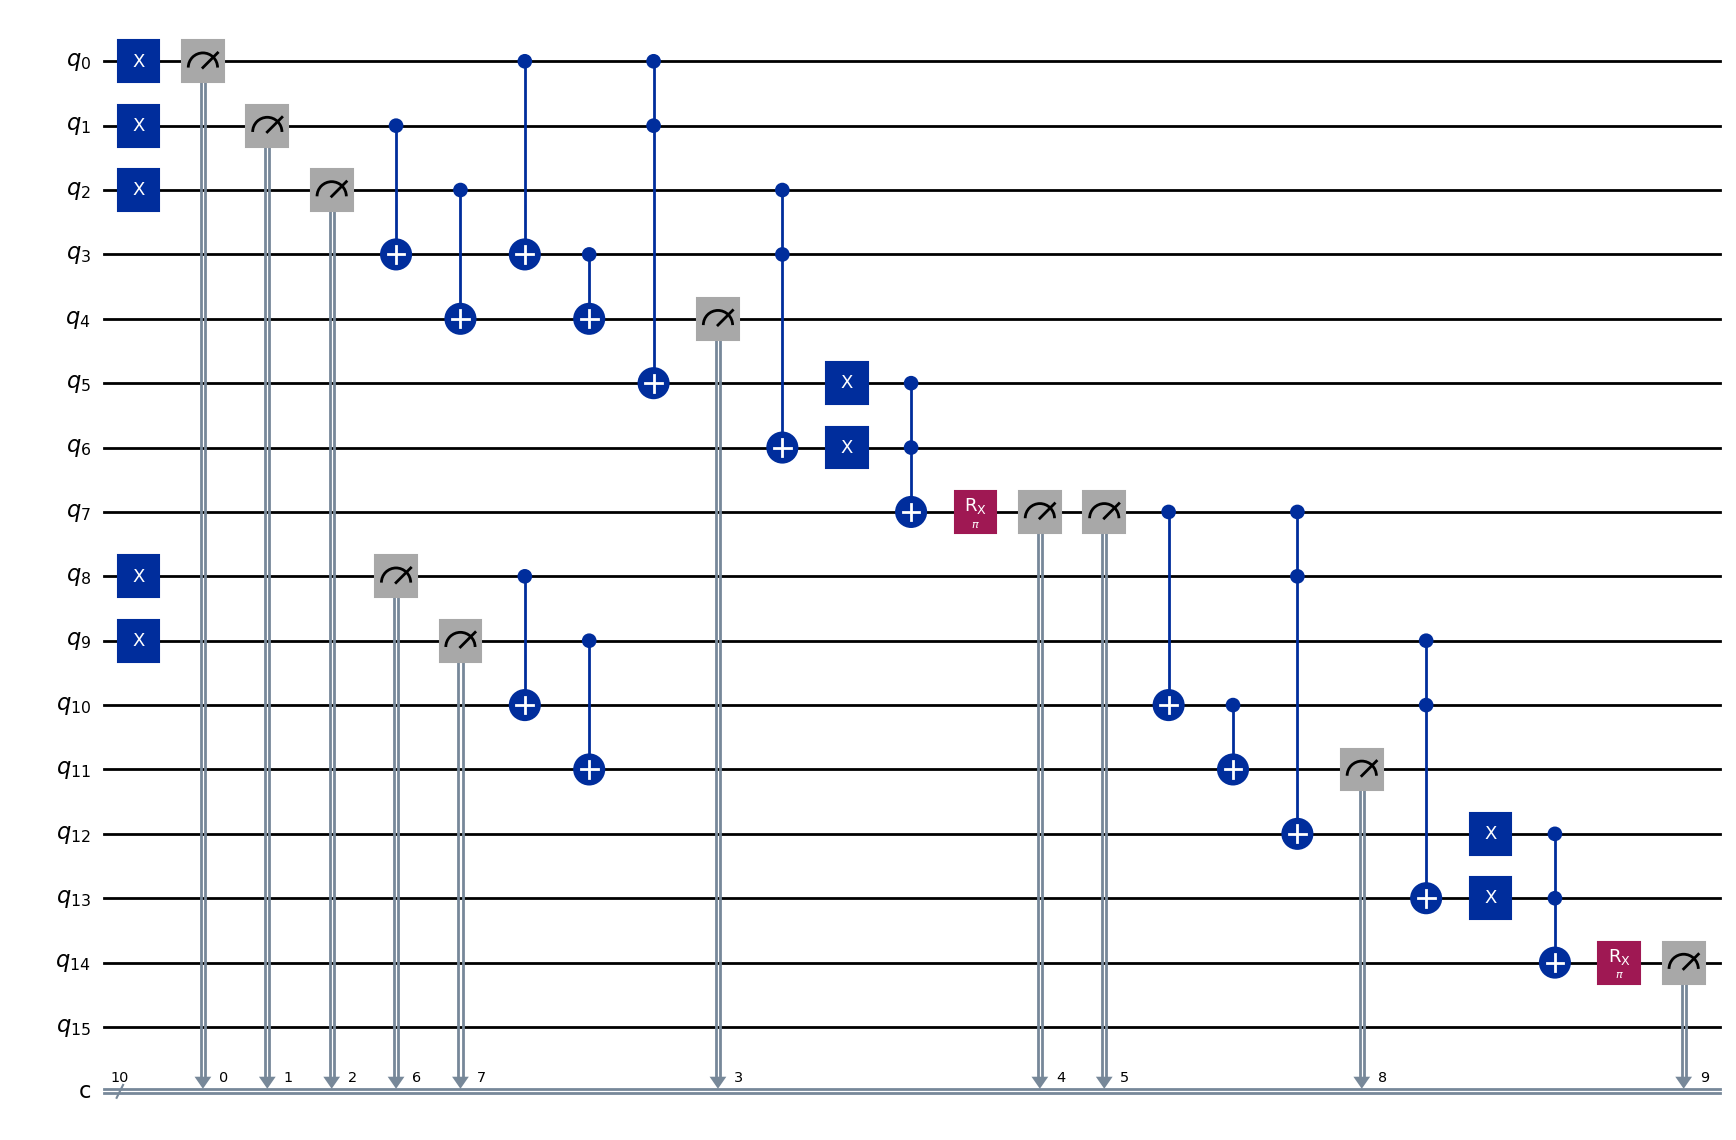

In [10]:
qc.draw(output='mpl',style='iqp')